In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
from scipy.stats import chi2_contingency
from itertools import chain
import string

o_df = pd.read_csv('observations.csv')
other = pd.read_csv('species_info.csv')
o_df.scientific_name.describe(include=all)
other.scientific_name.describe(include=all)
# print(other.dtypes)

count                  5824
unique                 5541
top       Castor canadensis
freq                      3
Name: scientific_name, dtype: object

#### Merging DataFrames

In [3]:
df = pd.merge(o_df, other, how='inner', on='scientific_name')

In [4]:
df.head(50)
# df.drop_duplicates()
# print(df.conservation_status.isna().sum())
# print(len(df))

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
5,Neovison vison,Yellowstone National Park,218,Mammal,American Mink,NaN
6,Neovison vison,Bryce National Park,91,Mammal,American Mink,NaN
7,Neovison vison,Yosemite National Park,200,Mammal,American Mink,NaN
8,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,NaN
9,Prunus subcordata,Yellowstone National Park,217,Vascular Plant,Klamath Plum,NaN


#### EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  object
 1   park_name            25632 non-null  object
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  object
 4   common_names         25632 non-null  object
 5   conservation_status  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [6]:
print('there are {} different species in our dataset'.format(df.scientific_name.nunique()))
print('there are {} different national parks in our dataset'.format(df.park_name.nunique()))
print(df.category.unique())

there are 5541 different species in our dataset
there are 4 different national parks in our dataset
['Vascular Plant' 'Mammal' 'Bird' 'Nonvascular Plant' 'Amphibian'
 'Reptile' 'Fish']


In [7]:
df.groupby('scientific_name').size()

scientific_name
Abies bifolia                          4
Abies concolor                         4
Abies fraseri                          4
Abietinella abietina                   4
Abronia ammophila                      4
                                      ..
Zonotrichia leucophrys gambelii        4
Zonotrichia leucophrys oriantha        4
Zonotrichia querula                    4
Zygodon viridissimus                   4
Zygodon viridissimus var. rupestris    4
Length: 5541, dtype: int64

#### null percentages

In [8]:
df.isna().sum() / len(df) * 100

scientific_name         0.000000
park_name               0.000000
observations            0.000000
category                0.000000
common_names            0.000000
conservation_status    96.566792
dtype: float64

C:\Users\Will Arnold\AppData\Local\Temp\ipykernel_25304\4001846859.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.category.unique(), rotation=90)


[Text(0, 0, 'Vascular Plant'),
 Text(1, 0, 'Mammal'),
 Text(2, 0, 'Bird'),
 Text(3, 0, 'Nonvascular Plant'),
 Text(4, 0, 'Amphibian'),
 Text(5, 0, 'Reptile'),
 Text(6, 0, 'Fish')]

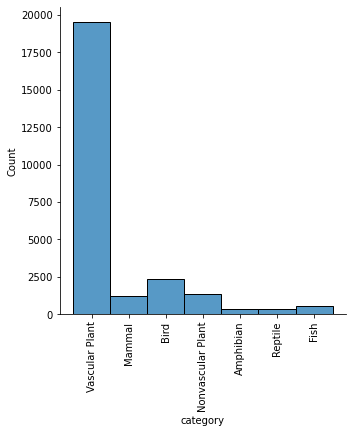

In [9]:
sns.displot(df.category)
ax = plt.subplot()
ax.set_xticklabels(df.category.unique(), rotation=90)

In [10]:
df.conservation_status.value_counts()

Species of Concern    732
Endangered             80
Threatened             44
In Recovery            24
Name: conservation_status, dtype: int64

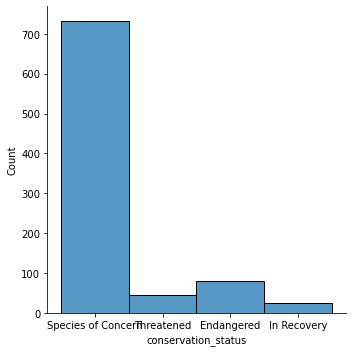

In [11]:
sns.displot(df.conservation_status)

[Text(0, 0, 'Great Smoky Mountains National Park'),
 Text(1, 0, 'Yosemite National Park'),
 Text(2, 0, 'Yellowstone National Park'),
 Text(3, 0, 'Bryce National Park')]

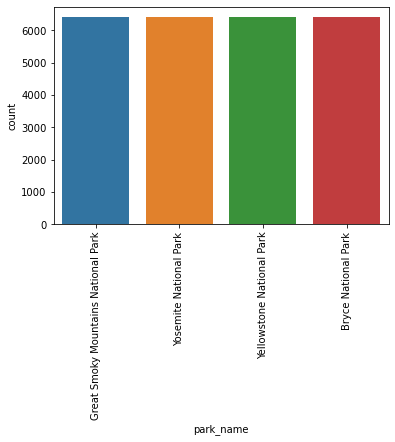

In [12]:
sns.countplot(x=df.park_name)
ax = plt.subplot()
ax.set_xticklabels(df.park_name.unique(), rotation=90)

Text(0, 0.5, 'frequency of observation')

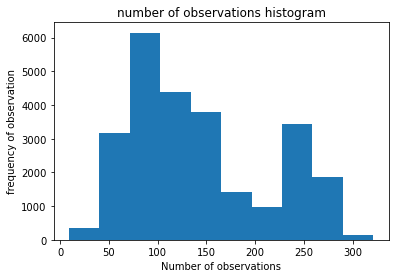

In [13]:
plt.hist(x=df.observations)
plt.title('number of observations histogram')
plt.xlabel('Number of observations')
plt.ylabel('frequency of observation')

In [14]:
len(df[df.scientific_name == 'Zizia trifoliata'])

4

In [15]:
nonull = df.dropna()
nob = nonull.observations.sum()
dob = df.observations.sum()
print('only {}% of our total observations are a species that need intervention'.format(round(nob/dob*100,2)))

only 2.82% of our total observations are a species that need intervention


#### Analysis

In [16]:
df.fillna('No Intervention', inplace = True)
df.groupby('conservation_status').size()

conservation_status
Endangered               80
In Recovery              24
No Intervention       24752
Species of Concern      732
Threatened               44
dtype: int64

**Contingency Tables**

In [17]:
#  create contingency table category vs conservation status
category_status_freq = pd.crosstab(df.category, df.conservation_status)
print(category_status_freq)

conservation_status  Endangered  In Recovery  No Intervention  \
category                                                        
Amphibian                     4            0              300   
Bird                         16           12             2016   
Fish                         12            0              476   
Mammal                       44           12              968   
Nonvascular Plant             0            0             1312   
Reptile                       0            0              304   
Vascular Plant                4            0            19376   

conservation_status  Species of Concern  Threatened  
category                                             
Amphibian                            16           8  
Bird                                320           0  
Fish                                 16          20  
Mammal                              168           8  
Nonvascular Plant                    20           0  
Reptile                             

In [18]:
# contingency table percentages
print(category_status_freq/len(df) *100)
print(category_status_freq.sum(axis=0))
print(category_status_freq.sum(axis=1))

conservation_status  Endangered  In Recovery  No Intervention  \
category                                                        
Amphibian              0.015605     0.000000         1.170412   
Bird                   0.062422     0.046816         7.865169   
Fish                   0.046816     0.000000         1.857054   
Mammal                 0.171660     0.046816         3.776529   
Nonvascular Plant      0.000000     0.000000         5.118602   
Reptile                0.000000     0.000000         1.186017   
Vascular Plant         0.015605     0.000000        75.593009   

conservation_status  Species of Concern  Threatened  
category                                             
Amphibian                      0.062422    0.031211  
Bird                           1.248439    0.000000  
Fish                           0.062422    0.078027  
Mammal                         0.655431    0.031211  
Nonvascular Plant              0.078027    0.000000  
Reptile                        0.078

In [19]:
# chi squared statistic
chi2, pval, dof, expected = chi2_contingency(category_status_freq)
print(chi2)
print('Strong association between category and conservation status')

3130.2341577189372
Strong association between category and conservation status


In [20]:
# contingency tables national park vs conservation_status 
park_status_freq = pd.crosstab(df.park_name, df.conservation_status)
print(park_status_freq)
chi2, pval, dof, expected = chi2_contingency(category_status_freq)
print(chi2)
print('no association between national park and conservation status')

conservation_status                  Endangered  In Recovery  No Intervention  \
park_name                                                                       
Bryce National Park                          20            6             6188   
Great Smoky Mountains National Park          20            6             6188   
Yellowstone National Park                    20            6             6188   
Yosemite National Park                       20            6             6188   

conservation_status                  Species of Concern  Threatened  
park_name                                                            
Bryce National Park                                 183          11  
Great Smoky Mountains National Park                 183          11  
Yellowstone National Park                           183          11  
Yosemite National Park                              183          11  
3130.2341577189372
no association between national park and conservation status


In [21]:
# compare number of observations to conservation status

df['is_protected'] = df.conservation_status != 'No Intervention'
category_df = df.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index().pivot(columns='is_protected', index='category',values='scientific_name').reset_index()
category_df.columns = ['category', 'not_protected', 'protected']
category_df['percent_protected'] = round(category_df.protected / (category_df.protected + category_df.not_protected) * 100,2)
print('mammals have the highest percentage needing intervention')
category_df

mammals have the highest percentage needing intervention


,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,115,11,8.73
3,Mammal,146,30,17.05
4,Nonvascular Plant,328,5,1.50
5,Reptile,73,5,6.41
6,Vascular Plant,4216,46,1.08


In [22]:
plants_crosstable = [[46, 4216],[5,328]]
chi2, pval, dof, expected = chi2_contingency(plants_crosstable)
print(chi2)
print(pval)

0.1906912123381206
0.6623419491381985


In [23]:
def mammal_chi2(species):
    crosstable = [[30, 146], []]
    crosstable[1].append(category_df.loc[category_df.category == species, 'protected'][1])
    crosstable[1].append(category_df.loc[category_df.category == species, 'not_protected'][1])
    return crosstable

chi2, pval, dof, expected = chi2_contingency(mammal_chi2('Bird'))
print('Mammal vs Bird similarity \nchi2 = {} \npval = {}'.format(chi2, pval))

Mammal vs Bird similarity 
chi2 = 0.1617014831654557 
pval = 0.6875948096661336


In [24]:
# chi2, pval, dof, expected = chi2_contingency(mammal_chi2('Reptile'))

In [66]:
chi2, pval, dof, expected = chi2_contingency([[30,146],[5,73]])
print(chi2)
print('mammals not statistically significantly associated with reptiles')

4.289183096203645
mammals not statistically significantly associated with reptiles


In [65]:
chi2, pval, dof, expected = chi2_contingency([[30,146],[7,72]])
print(chi2)
print('mammals are not statistically significantly associated with amphibians')

2.321746712946015
mammals are not statistically significantly associated with amphibians


### Analysis of mammal species

In [95]:
mammal_df = df[df.category == 'Mammal']
mammal_df.head()
mammal_df.common_names.unique()
mammal_value_counts = mammal_df.common_names[mammal_df.conservation_status != 'No Intervention'].unique()
print(mammal_value_counts)
print(mammal_df)
# for i in range(len(mammal_df)):
#     mammal_df.common_names

['Western Red Bat' 'Red Wolf'
 'California Myotis, California Myotis, Californian Myotis'
 'California Myotis' 'Gray Wolf' 'Gray Wolf, Wolf'
 'American Badger, Badger' 'Badger'
 'Little Brown Bat, Little Brown Myotis'
 'Little Brown Bat, Little Brown Myotis, Little Brown Myotis'
 'Little Brown Myotis' 'Big Brown Bat' 'Big Brown Bat, Big Brown Bat'
 'Gray Myotis' 'Pallid Bat, Pallid Bat'
 'Long-Eared Myotis, Long-Eared Myotis'
 'Northern Long-Eared Bat, Northern Myotis' 'Brush Rabbit'
 'Sierra Nevada Snowshoe Hare' 'Yuma Myotis, Yuma Myotis'
 'Spotted Bat, Spotted Bat' 'Ringtail' 'Fringed Myotis, Fringed Myotis'
 "Keen's Myotis" 'Sierra Nevada Mountain Beaver' 'Coyote'
 'Long-Legged Myotis, Long-Legged Myotis' 'Bighorn Sheep, Bighorn Sheep'
 'Silver-Haired Bat' 'Silver-Haired Bat, Silver-Haired Bat'
 'Sierra Nevada Bighorn Sheep' 'Mississippi Myotis, Southeastern Myotis'
 'Carolina Northern Flying Squirrel, Northern Flying Squirrel'
 'Indiana Bat, Indiana Or Social Myotis' 'Grizzly Bear

**summing the count of protected species together**

In [82]:
list_of_species = ['Wolf', 'Bat', 'Badger', 'Myotis', 'Sheep', 'Squirrel', 'Bear', 'Beaver', 'Coyote', 'Hare', 'Ringtail', 'Rabbit', 'Shrew']
count_of_species = []
for i in range(0,len(list_of_species)):
    count_of_species.append(mammal_df.common_names[mammal_df.conservation_status != 'No Intervention'].str.count(list_of_species[i]).sum())
    
print(count_of_species)
d = {'species': list_of_species, 'count': count_of_species}
stuff_count = pd.DataFrame(d)
stuff_count.head(50)


[64, 104, 24, 140, 12, 8, 4, 4, 4, 4, 4, 4, 8]


,species,count
0,Wolf,64
1,Bat,104
2,Badger,24
3,Myotis,140
4,Sheep,12
5,Squirrel,8
6,Bear,4
7,Beaver,4
8,Coyote,4
9,Hare,4


In [83]:
print('bats are the most endangered of the species')
print((140+104)/384*100)

bats are the most endangered of the species
63.541666666666664


**Analysis of other species**

In [30]:
amphibian_df = df[df.category == 'Amphibian']
bird_df = df[df.category == 'Bird']
fish_df = df[df.category == 'Fish']
reptile_df = df[df.category == 'Reptile']

In [108]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
common_Names = mammal_df.common_names.apply(remove_punctuation).str.split().tolist()
# print(common_Names)
common_Names[:6]

cleanRows = []
for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)

res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]
words_counted = []
for i in res:
    x = res.count(i)
    words_counted.append((i,x))

mammal_word_count_df = pd.DataFrame(set(words_counted), columns = ['word', 'count']).sort_values("count", ascending = False).reset_index().head(50)
mammal_word_count_df.drop('index', axis=1)
bat_count = mammal_word_count_df.loc[mammal_word_count_df.word =='Bat', ['count']]
myotis_count = mammal_word_count_df.loc[mammal_word_count_df.word == 'Myotis', ['count']]
bat_total = myotis_count.iat[0,0] + bat_count.iat[0,0]
bat_percentage_of_species = len(mammal_df)/bat_total
print('{}%'.format(round(bat_percentage_of_species,2)))
print(mammal_word_count_df)
print(*cleanRows, sep='\n')
animals_only = []
for i in range(0, len(cleanRows)):
    
    animals_only.append(animal[-1])
print(animals_only)

4.76%
    index         word  count
0     191          Bat    144
1      26       Myotis    108
2     178        Shrew    104
3     180     American     96
4      19        Mouse     72
5     190     Mountain     68
6     140         Gray     64
7     195       Common     64
8     175     Chipmunk     60
9     127        Brown     56
10    106         Vole     52
11    179      Eastern     48
12    131     Northern     48
13    125      Western     48
14    119     Squirrel     48
15     80         Wolf     40
16    163       Beaver     40
17     39         Lion     40
18     97         Deer     36
19     32      Raccoon     36
20    182       Little     36
21     37          Fox     32
22     63          Red     32
23    101   California     32
24    203        Feral     28
25    188     BigEared     28
26    128         Mink     24
27     78  WhiteTailed     24
28    152         Bear     24
29     96        Skunk     24
30    196   LongTailed     24
31      8      Spotted     24
32  

**animals in national park**

In [97]:
gsm_df = df[(df.park_name =='Great Smoky Mountains National Park') & (df.category == 'Mammal')]
yte_df = df[(df.park_name =='Yosemite National Park')&(df.category == 'Mammal')]
ystn_df = df[(df.park_name == 'Yellowstone National Park')&(df.category == 'Mammal')]
byce_df = df[(df.park_name == 'Brice National Park')&(df.category=='Mammal')]

gsm_common_names = gsm_df.common_names.apply(remove_punctuation).str.split().tolist()

gsm_cleanRows = []
for item in gsm_common_names:
    item = list(dict.fromkeys(item))
    gsm_cleanRows.append(item)

res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in gsm_cleanRows))
res[:6]
gsm_words_counted = []
for i in res:
    x = res.count(i)
    gsm_words_counted.append((i,x))

gsm_name_count_df = pd.DataFrame(set(gsm_words_counted), columns = ['word', 'count']).sort_values("count", ascending = False).reset_index()
print(gsm_name_count_df())


TypeError: 'DataFrame' object is not callable

In [55]:
yte_common_names = yte_df.common_names.apply(remove_punctuation).str.split().tolist()

yte_cleanRows = []
for item in yte_common_names:
    item = list(dict.fromkeys(item))
    yte_cleanRows.append(item)
    
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in yte_cleanRows))
res[:6]
yte_words_counted = []
for i in res:
    x = res.count(i)
    yte_words_counted.append((i,x))

yte_name_count_df = pd.DataFrame(set(yte_words_counted), columns = ['word', 'count']).sort_values("count", ascending = False).reset_index().head(50)
print(yte_name_count_df)

    index         word  count
0      64          Bat     36
1     105       Myotis     27
2       3        Shrew     26
3      65     American     24
4     163        Mouse     18
5      76     Mountain     17
6     120         Gray     16
7     189       Common     16
8     114     Chipmunk     15
9       7        Brown     14
10     88         Vole     13
11     56     Squirrel     12
12     71     Northern     12
13     60      Western     12
14    178      Eastern     12
15      2       Beaver     10
16    121         Wolf     10
17     23         Lion     10
18    185       Little      9
19     86         Deer      9
20    179      Raccoon      9
21    161          Red      8
22    194   California      8
23    131          Fox      8
24     26     BigEared      7
25     46        Feral      7
26     34        Skunk      6
27    175        Black      6
28      1      Spotted      6
29    123         Mink      6
30     16  WhiteTailed      6
31     90         Bear      6
32    197 

In [85]:
ystn_common_names = ystn_df.common_names.apply(remove_punctuation).str.split().tolist()

ystn_cleanRows = []
for item in ystn_common_names:
    item = list(dict.fromkeys(item))
    ystn_cleanRows.append(item)

res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in ystn_cleanRows))
res[:6]
ystn_words_counted = []
for i in res:
    x = res.count(i)
    ystn_words_counted.append((i,x))

ystn_name_count_df = pd.DataFrame(set(ystn_words_counted), columns = ['word', 'count']).sort_values("count", ascending = False).reset_index().head(50)
print(ystn_name_count_df)
print((36+27)/384*100)

    index         word  count
0      64          Bat     36
1     105       Myotis     27
2       3        Shrew     26
3      65     American     24
4     163        Mouse     18
5      76     Mountain     17
6     120         Gray     16
7     189       Common     16
8     114     Chipmunk     15
9       7        Brown     14
10     88         Vole     13
11     56     Squirrel     12
12     71     Northern     12
13     60      Western     12
14    178      Eastern     12
15      2       Beaver     10
16    121         Wolf     10
17     23         Lion     10
18    185       Little      9
19     86         Deer      9
20    179      Raccoon      9
21    161          Red      8
22    194   California      8
23    131          Fox      8
24     26     BigEared      7
25     46        Feral      7
26     34        Skunk      6
27    175        Black      6
28      1      Spotted      6
29    123         Mink      6
30     16  WhiteTailed      6
31     90         Bear      6
32    197 

In [64]:
byce_common_names = byce_df.common_names.apply(remove_punctuation).str.split().tolist()

byce_cleanRows = []
for item in byce_common_names:
    item = list(dict.fromkeys(item))
    byce_cleanRows.append(item)
    

res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in byce_cleanRows))
res[:6]
byce_words_counted = []
for i in res:
    x = res.count(i)
    byce_words_counted.append((i,x))

byce_name_count_df = pd.DataFrame(set(byce_words_counted), columns = ['word', 'count']).sort_values("count", ascending = False).reset_index().head(50)
print(byce_name_count_df)

Empty DataFrame
Columns: [index, word, count]
Index: []


### Conclusion

1. the vast majority of observations were of plants, but the majority of species that needed intervention were mammals
    - the mammals were had no strong statistical significance to the other species that we had analyzed due to a low chi square value
    - the other categories of animal are also not related to the others, no statistical significant association chi2 < 4
    - very strong association between category of animal and conservation status after replacing null status with 'No 
Intervention'
    - no statistical association between national park and conservation status
2. mammals were the most in need of intervention of all of the categories

3. of the ~800 entries that were not null, the large majority were bats or myotis, medium sized bats
    - 64% of all entries in the mammal category were bats or myotis
        - in all National Forests bats and myotis make up the large majority of in need of intervention species